# Part I - Loan Data from Prosper Exploration
## by Ahlam 

## Introduction
> This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others
 



## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import seaborn as sns
import seaborn as sn
import matplotlib.pyplot as mp
import seaborn as sb


pd.set_option('display.max_columns', None)

%matplotlib inline

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [2]:
df= pd.read_csv('prosperLoanData.csv')
df.sample(7)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
91526,424335962200355360DE18D,1070973,2013-12-04 16:18:05.303000000,NaN,36,Current,NaN,0.23438,0.1970,0.1870,0.17274,0.0899,0.08284,4.0,C,5.0,1,NV,Administrative Assistant,Employed,150.0,True,False,NaN,2013-12-04 16:18:08,640.0,659.0,2001-04-15 00:00:00,8.0,8.0,66.0,6,146.0,2.0,15.0,0.0,0.0,13.0,1.0,0.0,2868.0,0.94,113.0,39.0,0.60,3.0,0.08,"$50,000-74,999",True,4833.333333,1E0B370003566529994FCE1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,3,120622,5000,2013-12-09 00:00:00,Q4 2013,81EE370001575358673B424,185.05,555.1500,317.57,237.5800,-12.06,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
61188,82D9358022497647903CEF4,794772,2013-06-02 07:19:42.713000000,NaN,60,Current,NaN,0.32393,0.2969,0.2869,0.26120,0.1375,0.12370,2.0,E,3.0,1,GA,Police Officer/Correction Officer,Employed,175.0,False,False,NaN,2013-06-02 07:19:35,640.0,659.0,2001-09-18 00:00:00,5.0,5.0,10.0,5,227.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,10996.0,0.92,501.0,10.0,0.90,0.0,0.08,"$50,000-74,999",True,4576.000000,09D236842471893096A0120,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,9,91680,4000,2013-06-04 00:00:00,Q2 2013,8B5B3579637924487762B04,128.65,1157.8500,296.92,860.9300,-28.99,0.0,0.0,0.0,0.0,1.0,0,0,0.0,26
113906,C982341623647969155E514,300858,2008-03-28 11:38:58.730000000,AA,36,Completed,2011-04-07 00:00:00,0.07479,0.0680,0.0680,NaN,NaN,NaN,NaN,NaN,NaN,3,GA,Professional,Full-time,296.0,True,False,NaN,2008-03-20 13:45:47.250000000,780.0,799.0,1992-09-08 00:00:00,11.0,10.0,19.0,9,461.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,22693.0,0.30,49074.0,18.0,1.00,0.0,0.12,"$50,000-74,999",True,5916.666667,055D3417036857528921406,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,71,29350,3001,2008-04-07 00:00:00,Q2 2008,3C96341678488844723653F,92.39,3320.8900,3001.02,319.8700,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,135
40873,5F35360216794547078102E,1229661,2014-02-23 08:55:37.933000000,NaN,36,Current,NaN,0.22966,0.1920,0.1820,0.16810,0.0899,0.07820,4.0,C,4.0,1,TN,Police Officer/Correction Officer,Employed,41.0,False,False,NaN,2014-02-23 08:55:40,660.0,679.0,1998-04-06 00:00:00,9.0,7.0,28.0,6,220.0,0.0,0.0,0.0,0.0,13.0,1.0,0.0,3810.0,0.65,1706.0,25.0,0.84,3.0,0.32,"$25,000-49,999",True,3333.333333,F66C3707127048514F780A4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,1,134152,10000,2014-02-26 00:00:00,Q1 2014,7A4D370609659075980632F,367.57,0.0000,0.00,0.0000,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
11386,C8FF3600900065356CD57A6,1166795,2014-01-27 06:53:47.560000000,NaN,36,Current

#### new df that has specific columns that i decided to use it in exploration

In [3]:


df1= df[ [ 'EmploymentStatus','ProsperScore','IncomeRange', 
        'LoanCurrentDaysDelinquent', 'BorrowerRate', 'ProsperPrincipalOutstanding' ]]

# EmploymentStatus= حالة التوظيف للمقترض في الوقت الذي قام فيه بنشر القائمة.
#ProsperScore=  درجة مخاطر مخصصة تم إنشاؤها باستخدام بيانات Prosper التاريخية. تتراوح النقاط من 1 إلى 10 ، حيث يمثل الرقم 10 أفضل أو أقل درجة خطورة. ينطبق على القروض الناشئة بعد يوليو 2009.
# IncomeRange =  نطاق دخل المقترض وقت إنشاء القائمة.
# LoanCurrentDaysDelinquent=  عدد الأيام المتأخرة.
#BorrowerRate = 10 سعر فائدة المقترض على هذا القرض..
# ProsperPrincipalOutstanding =  أصل المبلغ المستحق على قروض بروسبر في وقت إنشاء القائمة. ستكون هذه القيمة لاغية إذا لم يكن لدى المقترض قروض سابقة.



In [4]:
# take a sample to work with it, no need to all the data that may make scatter plot not clear
df_s= df1.sample(3000)

In [5]:
df_s.head()

,EmploymentStatus,ProsperScore,IncomeRange,LoanCurrentDaysDelinquent,BorrowerRate,ProsperPrincipalOutstanding
19548,Employed,4.0,"$25,000-49,999",0,0.1984,NaN
75400,Self-employed,3.0,"$75,000-99,999",0,0.1795,NaN
8947,Employed,2.0,"$75,000-99,999",0,0.2999,NaN
82533,Employed,9.0,"$25,000-49,999",0,0.1449,NaN
14822,Other,5.0,"$25,000-49,999",0,0.3177,NaN


In [6]:
df_s.shape

(3000, 6)

In [7]:
for x in df_s[['BorrowerRate','ProsperScore','EmploymentStatus','IncomeRange', 'ProsperPrincipalOutstanding','LoanCurrentDaysDelinquent']]:
    print(df_s[x].value_counts())

0.3177    91
0.3500    52
0.3199    47
0.2900    37
0.2699    37
          ..
0.2540     1
0.3200     1
0.1895     1
0.1410     1
0.2943     1
Name: BorrowerRate, Length: 662, dtype: int64
4.0     338
8.0     322
6.0     313
7.0     278
5.0     267
3.0     198
9.0     179
2.0     145
10.0    128
11.0     42
1.0      15
Name: ProsperScore, dtype: int64
Employed         1788
Full-time         705
Self-employed     140
Not available     137
Other              99
Part-time          31
Not employed       23
Retired            17
Name: EmploymentStatus, dtype: int64
$25,000-49,999    818
$50,000-74,999    806
$75,000-99,999    470
$100,000+         452
$1-24,999         216
Not displayed     202
Not employed       23
$0                 13
Name: IncomeRange, dtype: int64
0.00        157
0.01         19
0.02          6
0.04          4
3317.05       2
           ... 
14541.71      1
1289.03       1
6625.08       1
2011.47       1
796.85        1
Name: ProsperPrincipalOutstanding, Length: 394, d

In [8]:
df_s['ProsperPrincipalOutstanding'].value_counts()

0.00        157
0.01         19
0.02          6
0.04          4
3317.05       2
           ... 
14541.71      1
1289.03       1
6625.08       1
2011.47       1
796.85        1
Name: ProsperPrincipalOutstanding, Length: 394, dtype: int64

In [9]:
df_s.dtypes

EmploymentStatus                object
ProsperScore                   float64
IncomeRange                     object
LoanCurrentDaysDelinquent        int64
BorrowerRate                   float64
ProsperPrincipalOutstanding    float64
dtype: object

In [10]:
df_s.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3000 entries, 19548 to 86406
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   EmploymentStatus             2940 non-null   object 
 1   ProsperScore                 2225 non-null   float64
 2   IncomeRange                  3000 non-null   object 
 3   LoanCurrentDaysDelinquent    3000 non-null   int64  
 4   BorrowerRate                 3000 non-null   float64
 5   ProsperPrincipalOutstanding  578 non-null    float64
dtypes: float64(3), int64(1), object(2)
memory usage: 164.1+ KB


In [11]:
df_s.isna().sum()

EmploymentStatus                 60
ProsperScore                    775
IncomeRange                       0
LoanCurrentDaysDelinquent         0
BorrowerRate                      0
ProsperPrincipalOutstanding    2422
dtype: int64

In [12]:
#drop all the null cuz we need to a clear plots
df_s = df_s.dropna()


In [13]:

df_s = df_s.astype({"ProsperScore": 'str'})


In [14]:
df_s.dtypes

EmploymentStatus                object
ProsperScore                    object
IncomeRange                     object
LoanCurrentDaysDelinquent        int64
BorrowerRate                   float64
ProsperPrincipalOutstanding    float64
dtype: object

In [15]:
# the score shouid be 1-10
df_s =df_s[(df_s.ProsperScore != '11.0')]


In [16]:
df_s.ProsperScore.value_counts()

8.0     69
6.0     68
5.0     63
9.0     59
7.0     57
4.0     53
3.0     42
10.0    35
2.0     32
1.0     14
Name: ProsperScore, dtype: int64

In [17]:
df_s.describe()

,LoanCurrentDaysDelinquent,BorrowerRate,ProsperPrincipalOutstanding
count,492.000000,492.000000,492.000000
mean,40.715447,0.194033,3060.924146
std,159.112279,0.076047,3922.179148
min,0.000000,0.056500,0.000000
25%,0.000000,0.129900,0.000000
50%,0.000000,0.187200,1741.755000
75%,0.000000,0.256600,4217.635000
max,1481.000000,0.350000,18778.360000


In [18]:
df_s.columns

Index(['EmploymentStatus', 'ProsperScore', 'IncomeRange',
       'LoanCurrentDaysDelinquent', 'BorrowerRate',
       'ProsperPrincipalOutstanding'],
      dtype='object')

In [19]:
df_s.dtypes

EmploymentStatus                object
ProsperScore                    object
IncomeRange                     object
LoanCurrentDaysDelinquent        int64
BorrowerRate                   float64
ProsperPrincipalOutstanding    float64
dtype: object

### What is the structure of your dataset?

> The dataset contains the required columns, which is the degree of risk from 1-10 degrees from the lowest to the highest. It also contains the employee's income range, the employment status, the interest rate, the amount due for the loan, and the number of days of delay.

### What is/are the main feature(s) of interest in your dataset?

> What is the effect of the mentioned variables on the degree of risk and the interest rate?

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I think high and low (ProsperPrincipalOutstanding, LoanCurrentDaysDelinquent, IncomeRange)& EmploymentStatus It may affect one way or another on the Borrower Rate and Prosper Score

## Univariate Exploration




c:\Users\micro\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
c:\Users\micro\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fu

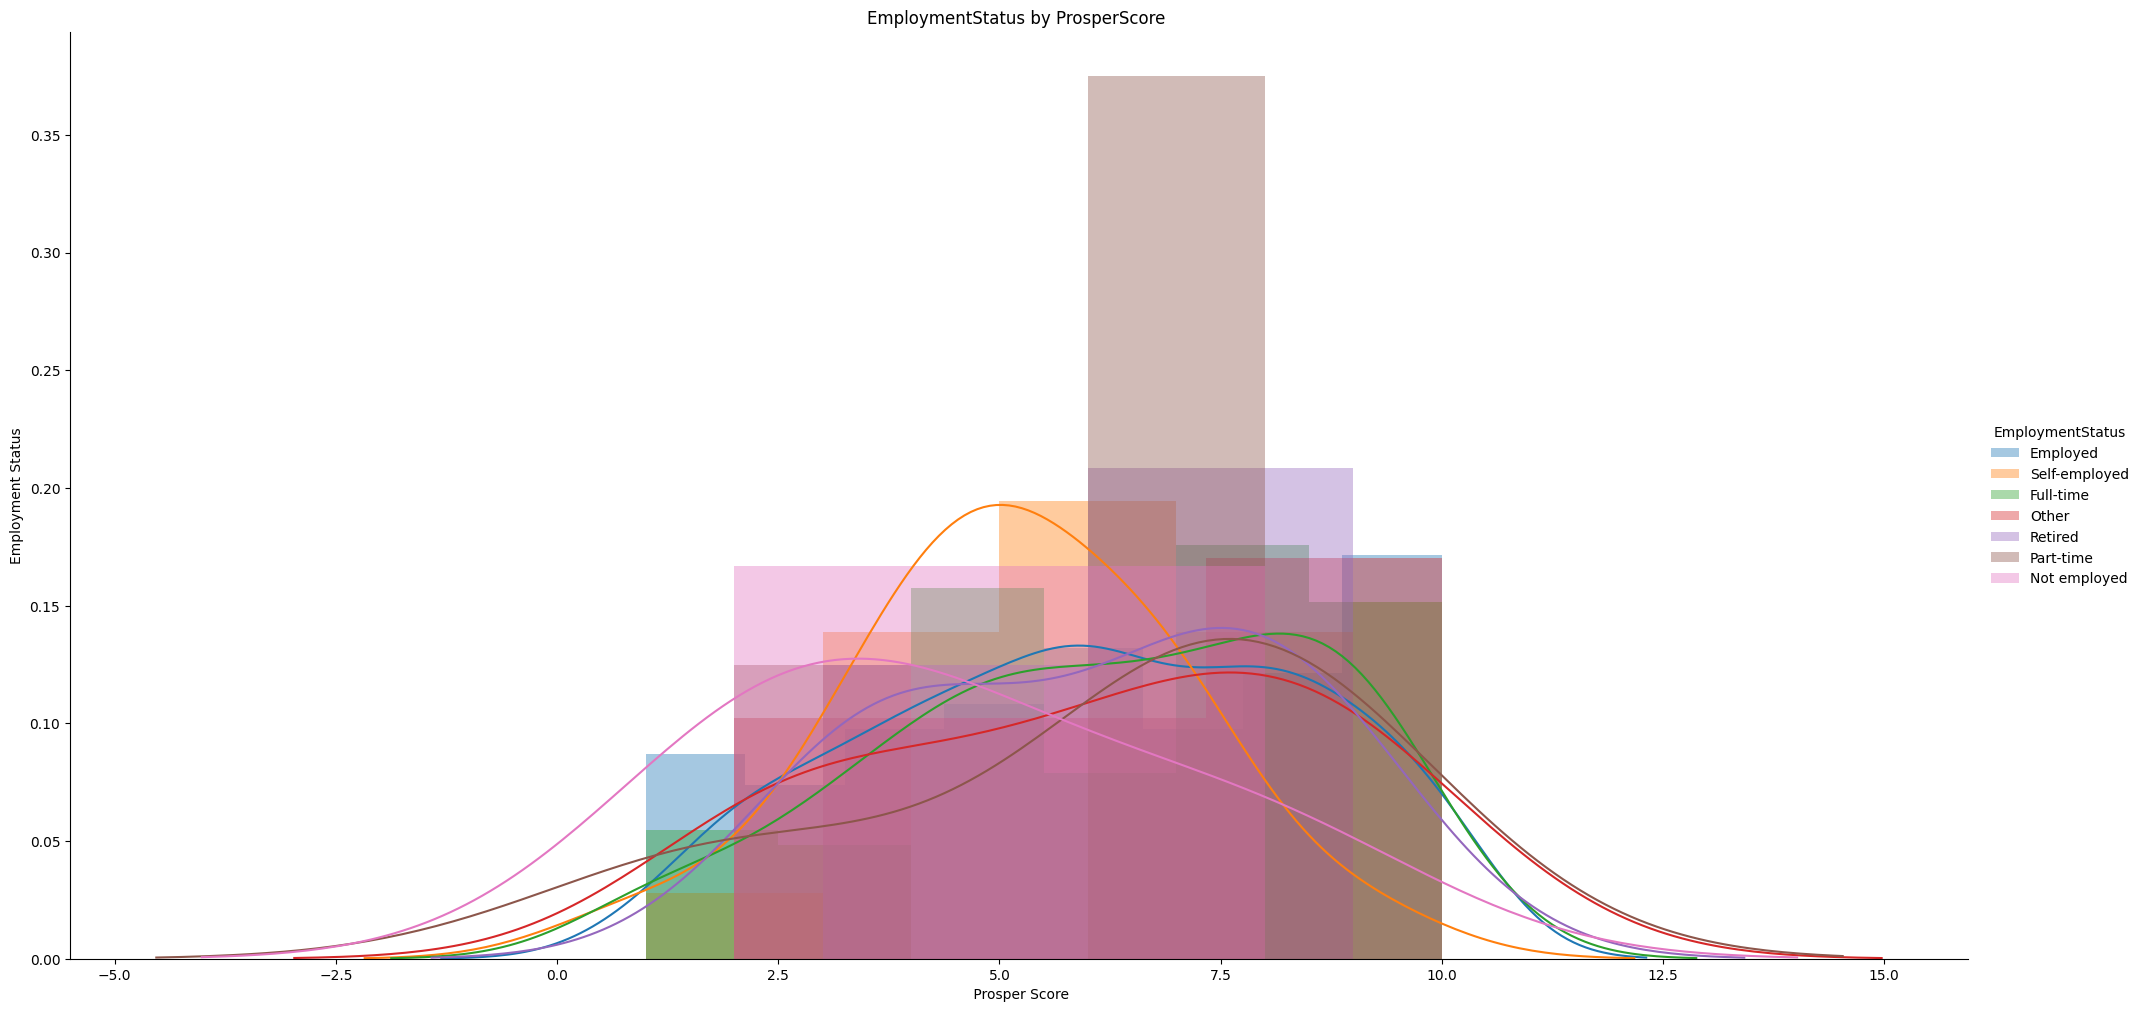

In [20]:
#found the embloyee status that in high risk


g=sns.FacetGrid(df_s, hue= 'EmploymentStatus',  height=10, aspect=2).map(sns.distplot, 'ProsperScore').add_legend()

axes = g.axes.flatten()

axes[0].set_ylabel("Employment Status")
for ax in axes:
    ax.set_xlabel(" Prosper Score")
plt.title('EmploymentStatus by ProsperScore ');

**As we see here 5 risk Score had the most borrowers Not employee, full time employee is lowest risk score, self-employee is the highst**

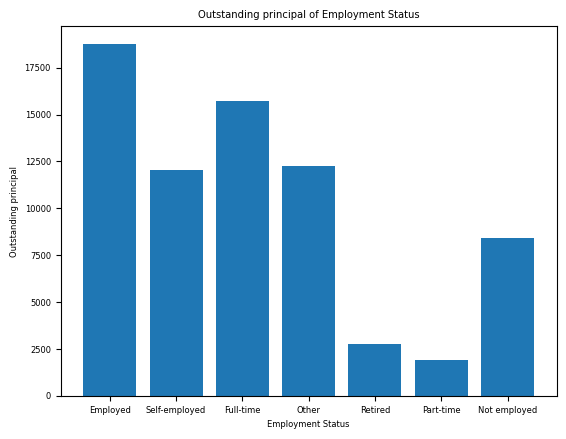

In [21]:

d= df_s['EmploymentStatus']
gg= df_s['ProsperPrincipalOutstanding']
plt.rcParams.update({'font.size':6})

plt.bar(d,gg)

plt.title('Outstanding principal of Employment Status')
plt.xlabel('Employment Status')
plt.ylabel('Outstanding principal')
plt.show()

**the outstanding principal hight with the employees but lowest for the part-time employees, the strange thing that not employees in center and outstanding here more than the pat-time ot retired**

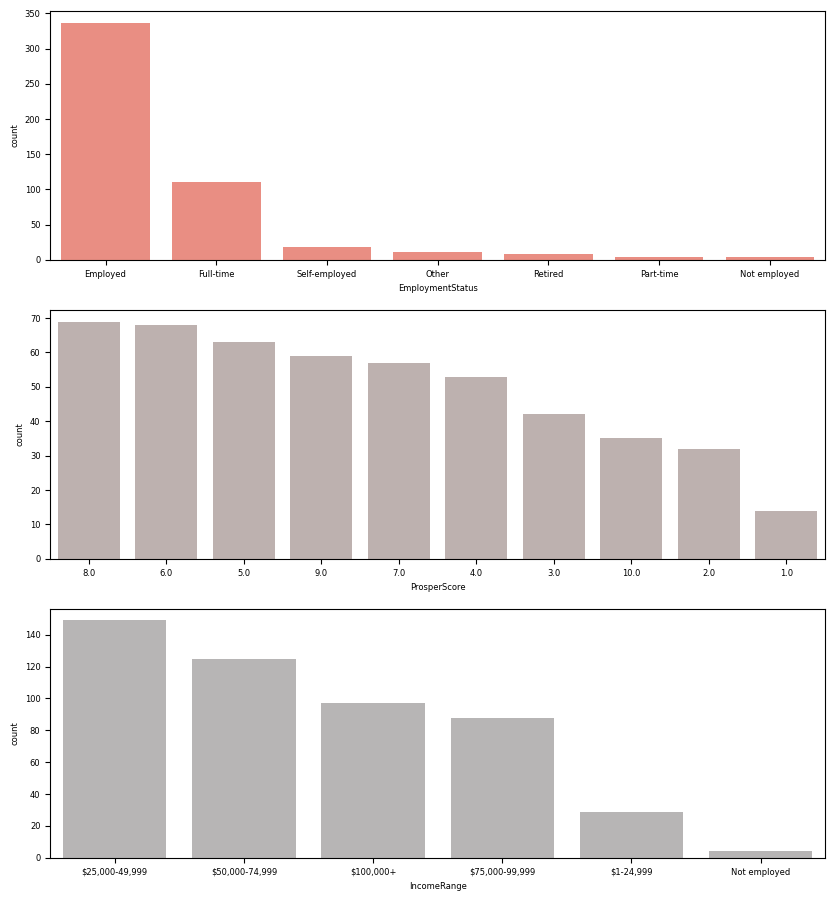

In [22]:
# see cout of each element 


fig, ax = plt.subplots(nrows=3, figsize = [10,11])

sb.countplot(data = df_s, x = 'EmploymentStatus' ,order=df_s['EmploymentStatus'].value_counts().index, color="salmon", ax = ax[0])
sb.countplot(data = df_s, x = 'ProsperScore',order=df_s['ProsperScore'].value_counts().index, color="salmon",saturation = 0.1, ax = ax[1])
sb.countplot(data = df_s, x = 'IncomeRange',order=df_s['IncomeRange'].value_counts().index, color = 'salmon',saturation = 0.02, ax = ax[2])

plt.show()


**Employment Status**<br>
**the emplyees count > the other Borrowers, the part time Borrowers count is the lowest** 

**Prosper Score** <br>
**The longest columns are at low risk degrees, and the longest column is based at 8 degrees, while the shortest column is at the most dangerous degree 1**

**Income Range** <br>
**Most incomes are average 50k-47,999**

In [23]:
categorical= ['EmploymentStatus', 'ProsperScore', 'IncomeRange']
numerical= ['LoanCurrentDaysDelinquent', 'BorrowerRate', 'ProsperPrincipalOutstanding']

In [24]:
# using for loop to find mean and median of the numerical columns
for c in numerical :
    print (c ,round(df_s[c].mean(),2),round(df_s[c].median(),2))



LoanCurrentDaysDelinquent 40.72 0.0
BorrowerRate 0.19 0.19
ProsperPrincipalOutstanding 3060.92 1741.76


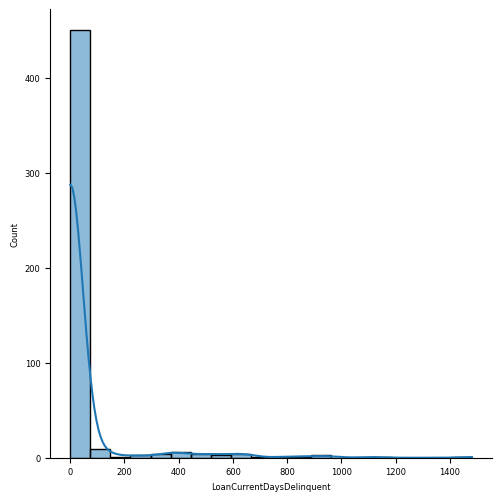

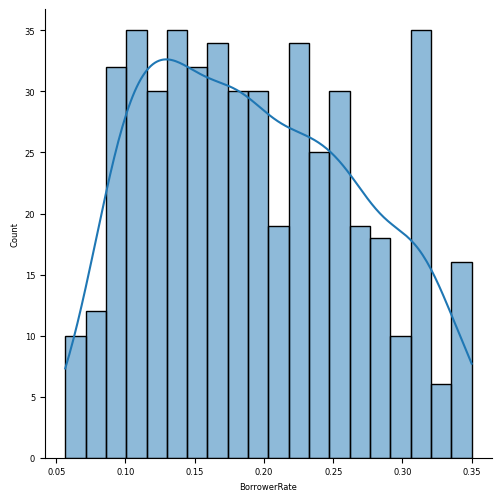

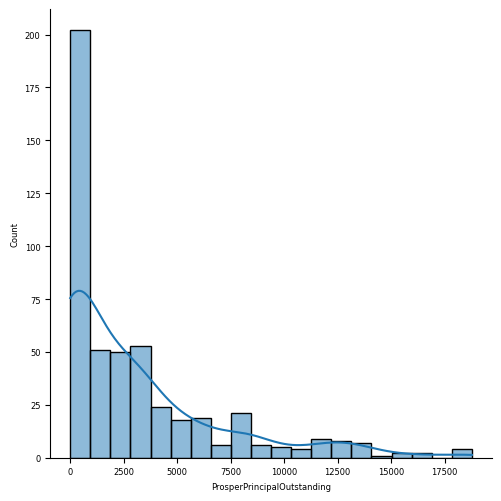

In [25]:
# using for loop to plot Distribution of the Numerical var
for inum,coln in enumerate(numerical):
    sns.displot(x= coln,data=df_s,bins=20,kde= True)
    plt.show()

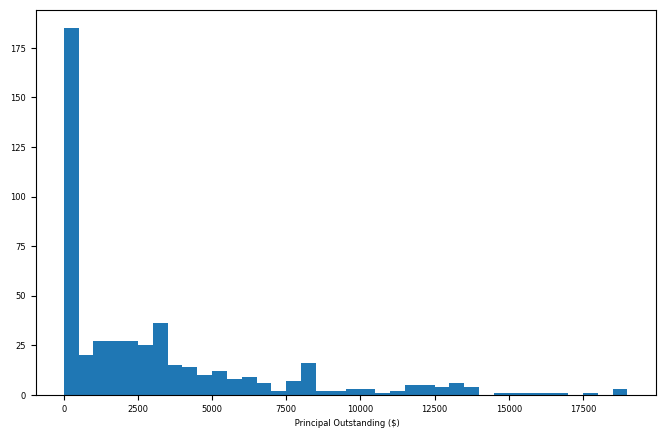

In [26]:
binsize = 500
bins = np.arange(0, df_s['ProsperPrincipalOutstanding'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df_s, x = 'ProsperPrincipalOutstanding', bins = bins)
plt.xlabel(' Principal Outstanding ($)')
plt.show()

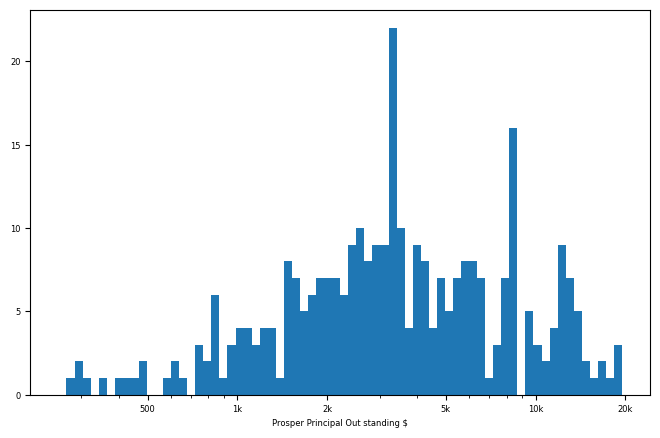

In [27]:
# need to log scale instead cuz of the long tail in the distribution

log_binsize = 0.027
bins = 10 ** np.arange(2.4, np.log10(df_s['ProsperPrincipalOutstanding'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df_s, x = 'ProsperPrincipalOutstanding', bins = bins)
plt.xscale('log')
plt.xticks([500, 1e3, 2e3, 5e3, 1e4, 2e4], [500, '1k', '2k', '5k', '10k', '20k'])

plt.xlabel('Prosper Principal Out standing $')
plt.show()

**A long tail is evident at zero in Principal Outstanding, there is little distribution at large amounts in the drawing**
**In the logarithmic graph, we see the distribution mediating the graph at approximately $5,000. It achieved the highest figure that is clear at the amount of $4,000, while there is a strong decline equal to zero at $7,000.**

<AxesSubplot: >

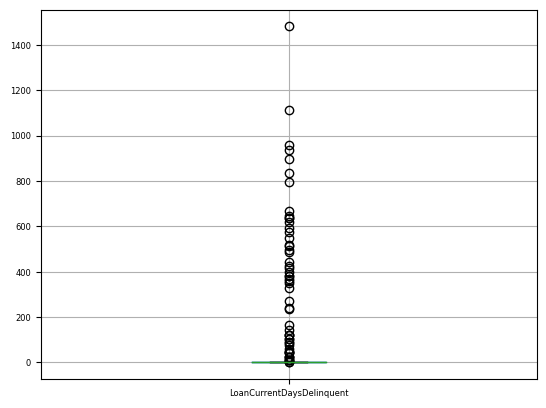

In [28]:
#Boxplot
df_s[['LoanCurrentDaysDelinquent']].boxplot()



**As it appears, most of the values ​​are stacked at 200-300 and begin to diverge until we find extreme values ​​at 1450.**
**Which means that the number of days of delay is equivalent to a year**

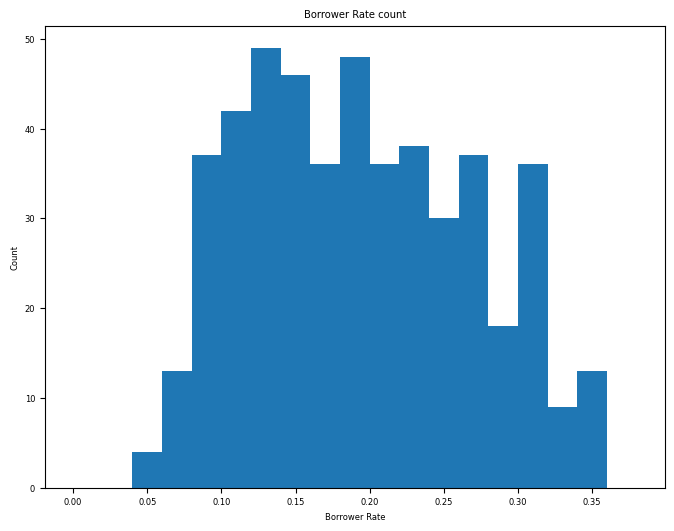

In [29]:


fig = plt.figure(figsize=(8, 6))
rate = np.arange(0, df_s.BorrowerRate.max()+0.05, 0.02)
plt.hist(data=df_s, x='BorrowerRate', bins=rate);
plt.xlabel('Borrower Rate');
plt.ylabel('Count');
plt.title('Borrower Rate count');


**The interest rate distribution ranges from 0.10 - 0.25, in 0.32 There is a clear increase also**

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The ProsperPrincipalOutstanding variable took on a large range of values, so the log transform is used, the transformation showed the Principal Outstanding bimodal, Employment status (non-employee, retired, self-employee) recorded the highest risk scores, while the part-time employee was in the middle.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> log was used for ProsperPrincipalOutstanding cuz of the long tail and the small valus, then i saw clearly the distributio, there are some outliers in LoanCurrentDaysDelinquent but i didnt change it cuz count of days is deffrint between each  loans

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

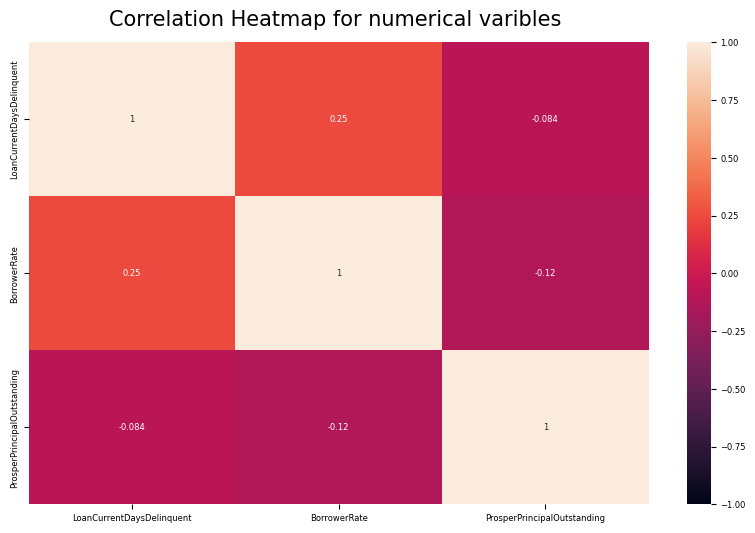

In [30]:
# Increase the size of the heatmap.


plt.figure(figsize=(10, 6))
heatmap = sns.heatmap(df_s[numerical].corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap for numerical varibles ', fontdict={'fontsize':15}, pad=12);

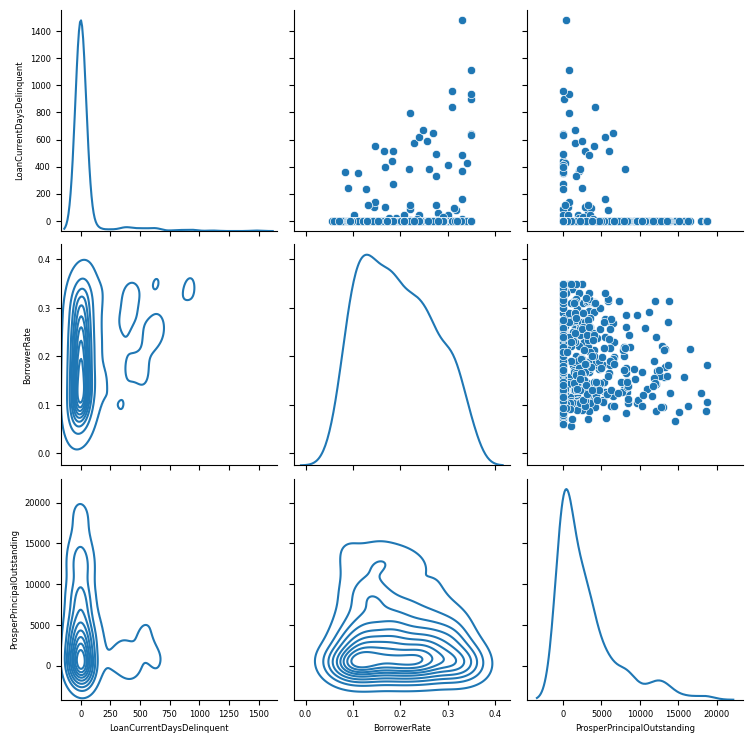

In [31]:

# see all numerical ver

all2corr = sns.PairGrid(df_s[numerical], diag_sharey=False)
all2corr.map_upper(sns.scatterplot)
all2corr.map_lower(sns.kdeplot)
all2corr.map_diag(sns.kdeplot)

**The results here tend to zero, meaning that the relationship between these variables is weak. The weakest relationship here is between ProsperPrincipalOutstanding and LoanCurrentDaysDelinquent with a negative value of -0.0077. The strongest relationship refers to BorrowerRate and LoanCurrentDaysDelinquent with a positive value of 0.22.**

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


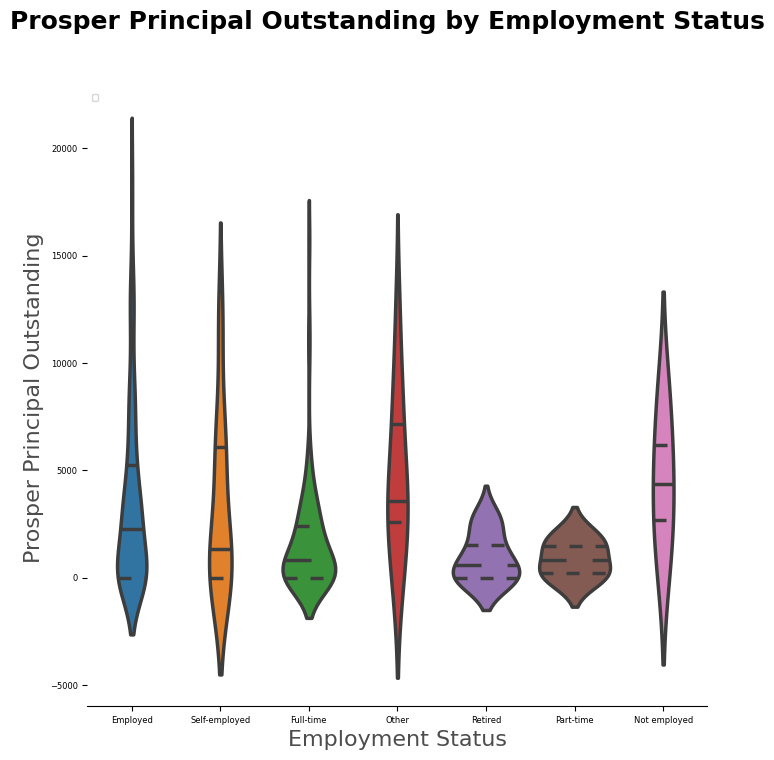

In [32]:

title, axis = plt.subplots(figsize=(8, 8))
sns.violinplot(x="EmploymentStatus", y="ProsperPrincipalOutstanding", data=df_s, split=True, linewidth=2.5,
               inner="quart")
sns.despine(left=True)

title.suptitle('Prosper Principal Outstanding by Employment Status', fontsize=18, fontweight='bold')
axis.set_xlabel("Employment Status",size = 16,alpha=0.7)
axis.set_ylabel("Prosper Principal Outstanding",size = 16,alpha=0.7)
plt.legend(loc='upper left')

**We can clearly see how the employees have the highest amount owed, which reaches more than 20,000, but weakly, as the distribution is dense between 0-5000, as in most cases. Also, cases of non-employee and part-time employee show small and almost non-existent due amounts for the part-time employee.**
**Whenever there is a fixed income for the status, the Outstanding owed are greater**

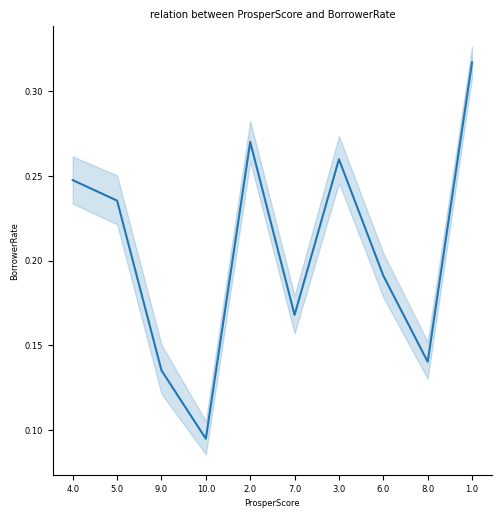

In [33]:
#relation between ProsperScore and BorrowerRate

sns.relplot(data=df_s, x="ProsperScore", y="BorrowerRate", kind="line").set(title='relation between ProsperScore and BorrowerRate')


**Through the graph, we see that interest rates are high at high risk levels, a direct relationship**

<AxesSubplot: xlabel='ProsperScore', ylabel='IncomeRange'>

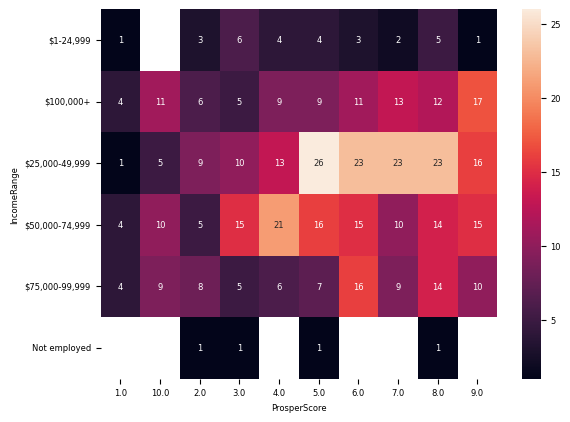

In [34]:
##relationship between IncomeRange and ProsperScore

ct_counts = df_s.groupby([ 'IncomeRange', 'ProsperScore']).size()
ct_counts = ct_counts.reset_index(name='count')
ct_counts = ct_counts.pivot(index = 'IncomeRange', columns = 'ProsperScore', values = 'count')
sb.heatmap(ct_counts, annot = True, fmt = '.0f')


**Low incomes were centered on high risk rates as shown, while high incomes had low risk rate**

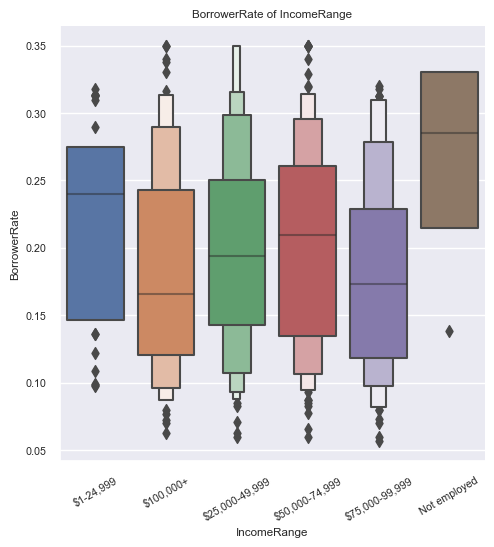

In [35]:

sns.set(font_scale=0.7)
ff=sns.catplot(
    data=df_s.sort_values("IncomeRange"),
    x="IncomeRange", y="BorrowerRate", kind="boxen",
).set(title='BorrowerRate of IncomeRange').set_xticklabels(rotation=30)


**We see here that the median decreases at high incomes range , as income 100,000 records the lowest median at an interest rate of 0.16, while the highest median was among non-employees, an inverse relationship**

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> many relationships were seen between the features that you chose. There is a direct relationship between the increase in the risk rate and the increase in the interest rate. This was shown by the linear graph. There was an inverse relationship between the income rate and the interest rate, where the interest decreases with the increase in income. This relationship was shown through the boxplots,An inverse relationship also appeared between ProsperScore IncomeRange, as it turned out that the higher the income, the lower the risk

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Yes between ProsperPrincipalOutstanding and EmploymentStatus Whenever there is a fixed income for the status, the Outstanding owed are greater

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

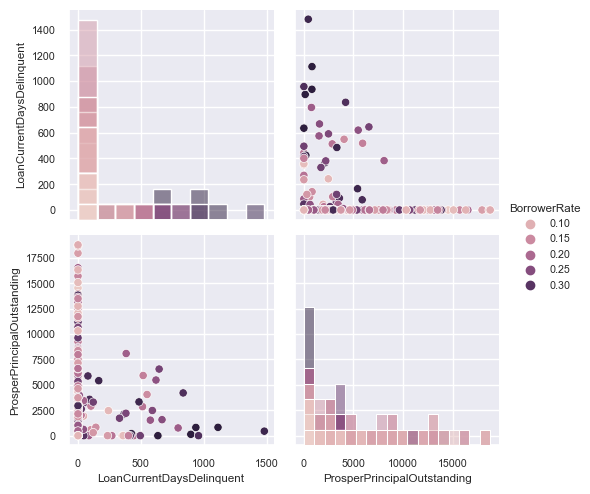

In [36]:

g = sns.PairGrid(df_s[numerical], hue="BorrowerRate")
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()


**The interest rate in pink, centered at the value 0-15000 in ProsperPrincipal, and centered at the bottom, meaning that its value is zero at the number of days of delay for the y-axis**
**There is a negative relationship between ProsperPrincipalOutstanding and LoanCurrentDaysDelinquent.**

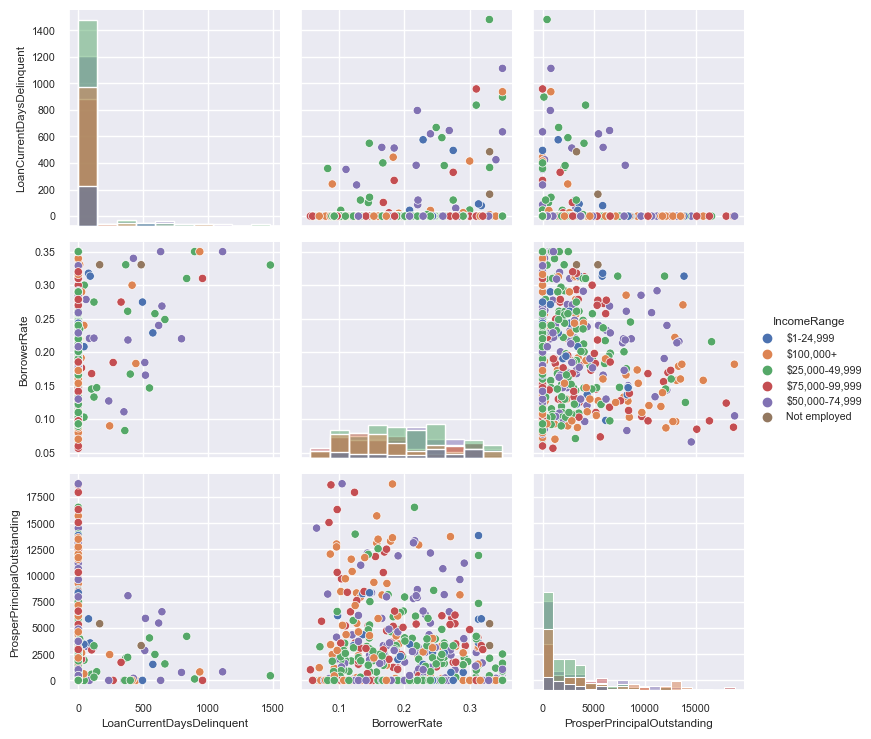

In [37]:
#relation between IncomeRange and numerical ver
g = sns.PairGrid(df_s, hue="IncomeRange")
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()

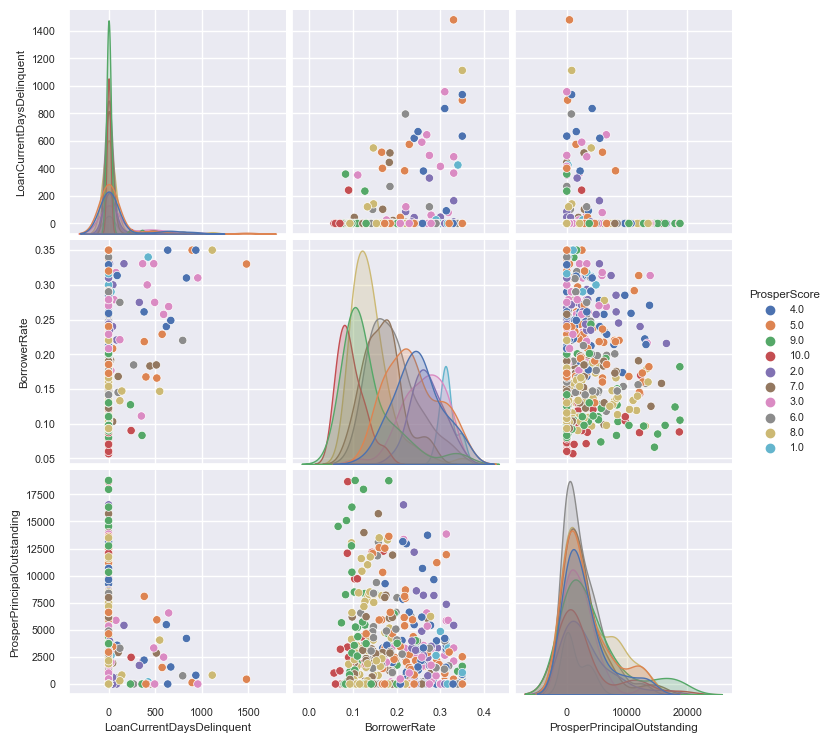

In [38]:
#relation between ProsperScore and numerical ver

sns.pairplot(df_s, hue="ProsperScore", height=2.5)


**It clearly shows how the blue risk points accumulate at low interest rates on the X axis and extend along the amount due, while the opposite occurs at high risk levels. They accumulate at high interest rates at low due amounts.**

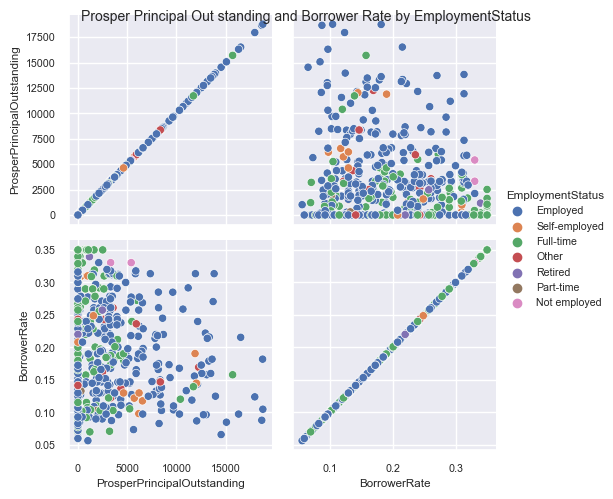

In [39]:
gg = sns.PairGrid(df_s, vars=["ProsperPrincipalOutstanding", "BorrowerRate"], hue="EmploymentStatus")
gg.map(sns.scatterplot).add_legend()
gg.fig.suptitle('Prosper Principal Out standing and Borrower Rate by EmploymentStatus');

**There is no relationship here except that employees occupy the most graph**

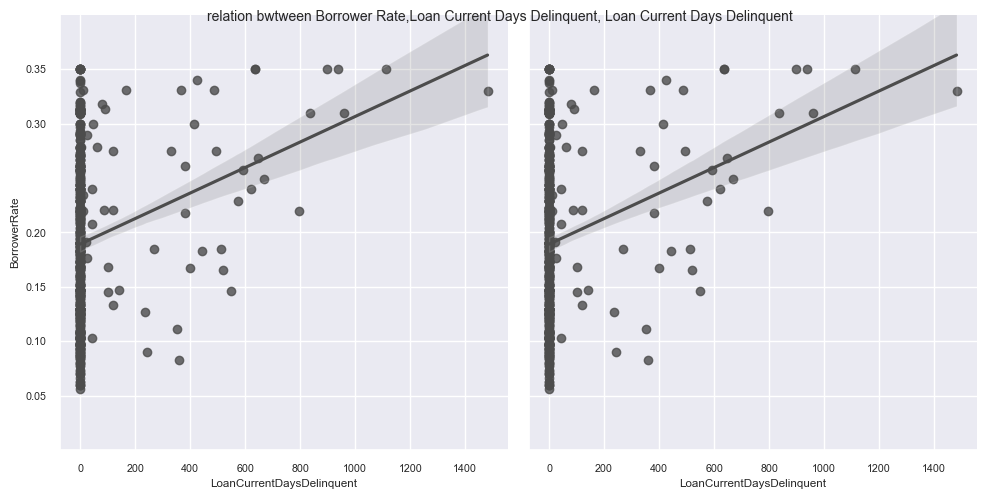

In [40]:



g = sns.PairGrid(df_s, y_vars=["BorrowerRate"], x_vars=["LoanCurrentDaysDelinquent", "LoanCurrentDaysDelinquent" ], height=5)
g.map(sns.regplot, color=".3")
g.set(ylim=(0, 0.4), yticks=[0.05, 0.10,0.15, 0.20,0.30,0.35])
g.fig.suptitle('relation bwtween Borrower Rate,Loan Current Days Delinquent, Loan Current Days Delinquent');

**It shows a positive relationship between the increase in the interest rate and the increase in the number of days of delay** 
**The upward spread of points shows a negative relationship between the increase in the interest rate and the increase in the amount owed**


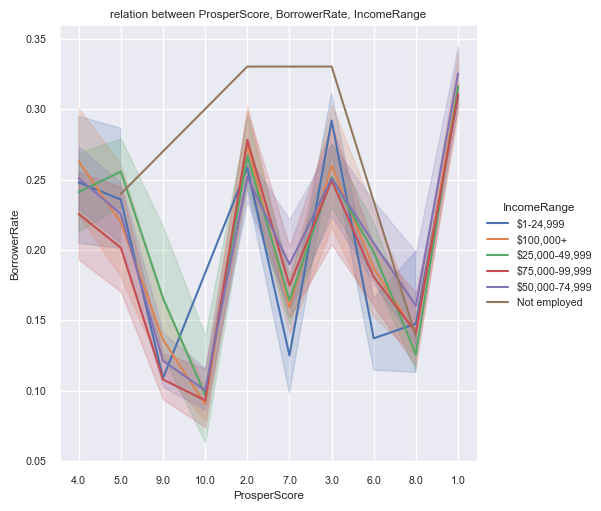

In [41]:

sns.relplot(
    data=df_s, kind="line",
    x="ProsperScore", y="BorrowerRate",
    hue="IncomeRange", 
).set(title= 'relation between ProsperScore, BorrowerRate, IncomeRange')

**An inverse relationship appears between the increase in income, the increase in interest, and the increase in risk, as we see low-income people in orange with the highest benefits at high risk levels**

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> I noticed that the relationship between the interest rate and the risk rate is direct, where the interest rate increases with the increase in the risk rate, while they have an inverse relationship with income, where the interest rate and the risk rate rise at low income

### Were there any interesting or surprising interactions between features?

> with scatter plot It shows a positive relationship between the increase in the interest rate and the increase in the number of days of delay** 
**The upward spread of points shows a negative relationship between the increase in the interest rate and the increase in the amount owed, 

## Conclusions
> First, I explored the database and determined the important variables that I would use to discover the relationships. Then I started Univariate Exploration. I used bar charts for exploration and it became clear through them the employment status (non-employed, retired, self-employed) that recorded the highest risk, while the part-time employee was in the middle. I moved After the Bivariate Exploration stage, many relationships were seen between the features you selected. There is a direct relationship between the increase in the risk rate and the increase in the interest rate, after that I Multivariate Exploration and I noticed that the relationship between the interest rate and the risk rate is direct, while they have an inverse relationship with income
